# Checking the hypothesis slope is 0 with F statistic
H0 : B1 = 0

$ F={\frac  {{\text{explained variance}}}{{\text{unexplained variance}}}},$
or
$F={\frac  {{\text{between-group variability}}}{{\text{within-group variability}}}}.$


In [342]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import f_regression, f_classif
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Classification example for categorical feature

In [343]:
titanic = pd.read_csv('../../data/titanic.csv')
titanic = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Parch', 'SibSp',
                   'Survived']]
titanic.dropna(inplace=True)
X = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Parch', 'SibSp']].copy()
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
y = titanic['Survived']

## P values by f_regression

In [344]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
f_stat, p_values = f_classif(X, y)
p_series = pd.Series(p_values, index=X.columns, dtype='float')
p_series

Pclass   0.00000
Sex      0.00000
Age      0.03912
Fare     0.00000
Parch    0.01261
SibSp    0.64333
dtype: float64

In [345]:
f_stat

array([1.05779868e+02, 2.91287485e+02, 4.27119493e+00, 5.51794876e+01,
       6.25460704e+00, 2.14599289e-01])

In [346]:
alpha = 0.05
redundant = p_series[p_series > alpha]
redundant

SibSp   0.64333
dtype: float64

## By hand calculation for 'Sex' feature

If you know the correlation coefficient, the square of that gives coefficient
of determination R2 which gives the explained variance over total variance.
From there, you can work out the F.
If we know R2 , which is SRR / SSTO , then 1- R2 gives us SSE / SSTO .
To get an F score, we can do R2 / ((1−R2) / (n-2)) since the denominator will
cancel out.

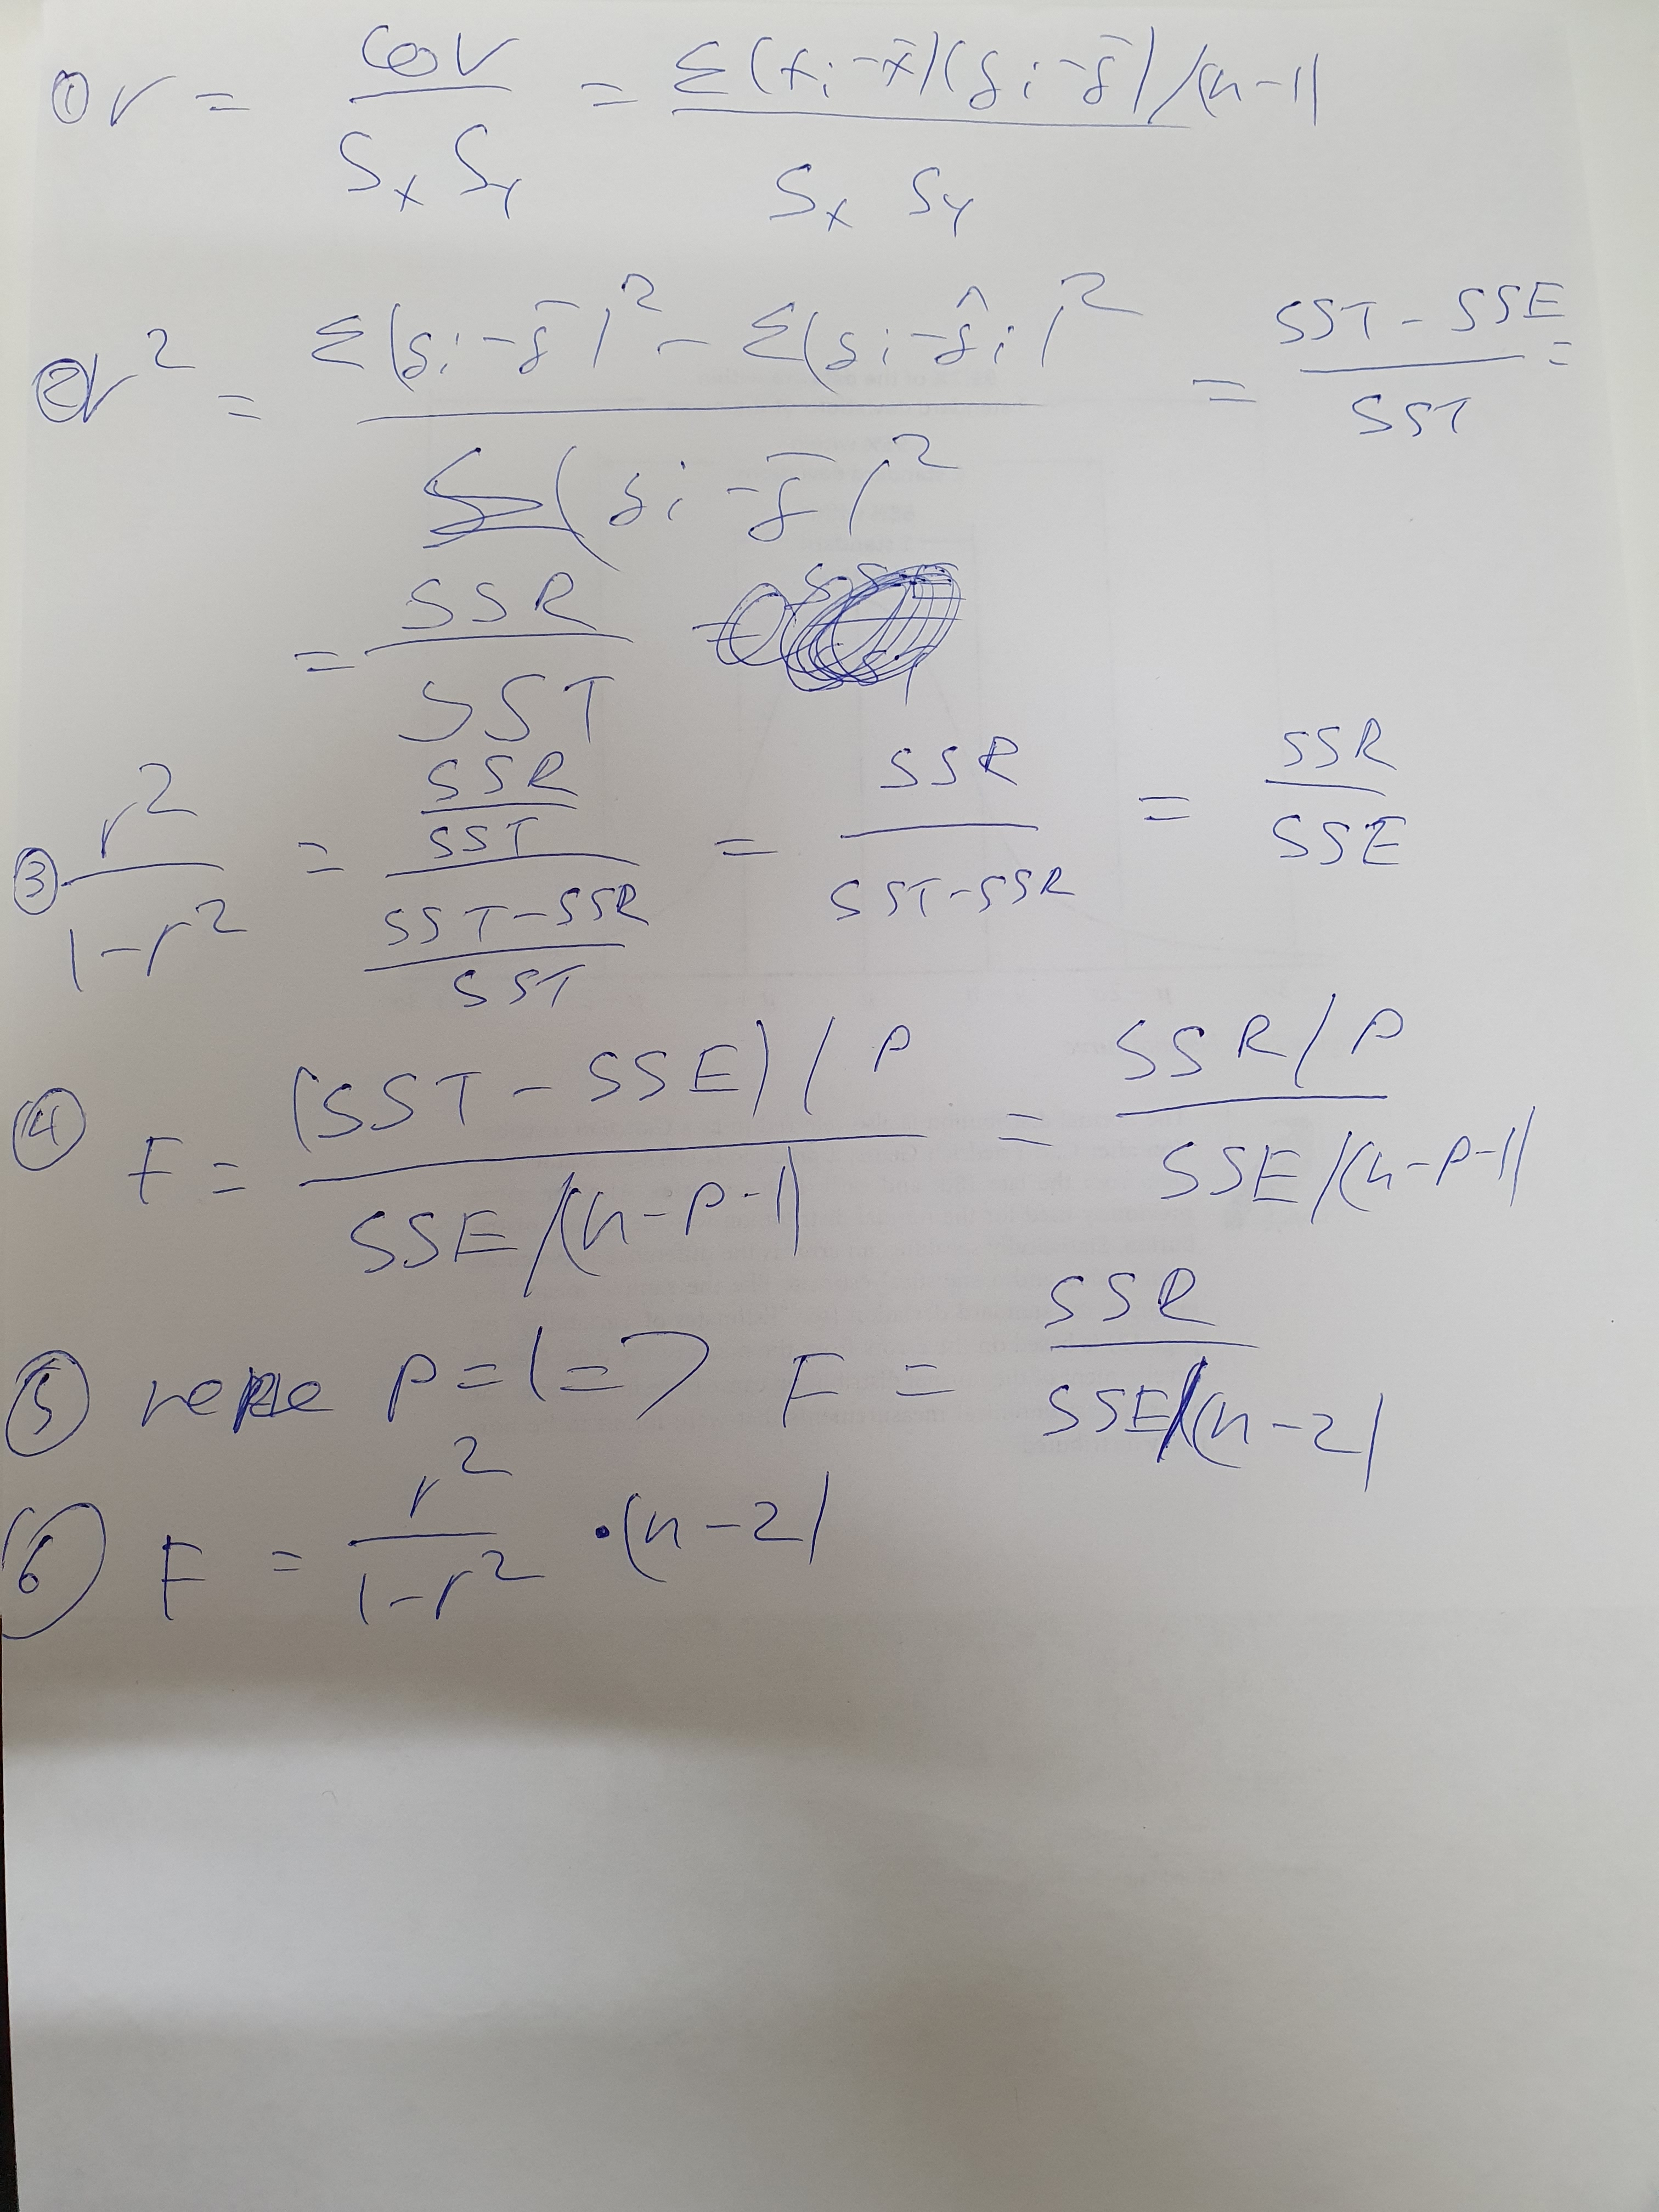

In [347]:
from IPython.display import Image
Image(filename='C:\python\ML Course\Code templates\Statistics/20220107_002614.jpg')

In [348]:
covariance = \
    ((X['Sex'] - X['Sex'].mean()) * (y - y.mean())).sum() / (len(X) - 1)
correlation = covariance / (X['Sex'].std() * y.std())
r_2 = correlation ** 2
r_2

0.29033301968757363

In [349]:
corr = p_series['Sex']
degrees_of_freedom = len(y) - 2
F = r_2 / (1 - r_2) * degrees_of_freedom
print(f'F-statistic: {F} with degrees of freedom: {degrees_of_freedom}')

F-statistic: 291.28748518994996 with degrees of freedom: 712


In [350]:
degrees_of_freedom

712

# Regression example with classic calculation
H0: Means of treatments are the same
H1: Means of treatments are not the same
H0 : 𝜇1 = ⋯ = 𝜇I versus H1 : two or more of the 𝜇i are different

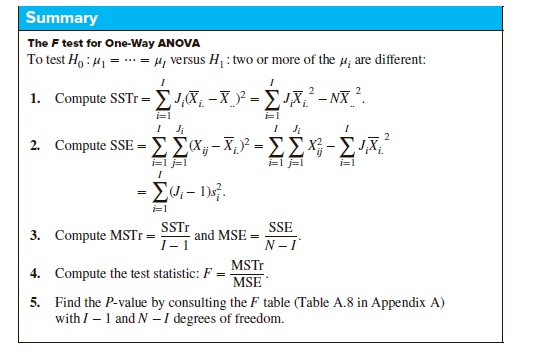

In [351]:
from IPython.display import Image
Image(filename='../Data/F.jpg')

In [352]:
treatments = [1] * 5 + [0] * 15
values = [250, 264, 256, 260, 239, 263, 254, 267, 265, 267, 257, 279, 269,
          273, 277, 253, 258, 262, 264, 273]

In [353]:
df = pd.DataFrame({'Treatment': treatments, 'Results': values})

In [354]:
X = df.drop('Results', axis=1)
y = df['Results']

# SSTr - treatment sum of squares, variation of sample means around the grand mean
or Treatment sum of squares(the more observations there are in a sample, the
more valuable is its difference between mean and grand mean

In [355]:
len_t1 = X[X['Treatment'] == 1].shape[0]
len_other = len(X) - len_t1

t1_mean = y[X['Treatment'] == 1].mean()
other_t_mean = y[X['Treatment'] == 0].mean()
grand_mean = y.mean()

sstr = np.square((t1_mean - grand_mean)) * len_t1 + \
    np.square((other_t_mean - grand_mean)) * len_other
sstr

504.59999999999707

# SSE - error sum of squares - measures the variation between sample points and their respective means
Show the variation inside the treatments

In [356]:
sse = np.sum(np.square(y[X['Treatment'] == 1] - t1_mean)) + \
    np.sum(np.square(y[X['Treatment']== 0] - other_t_mean))
sse

1262.3999999999996

# Find MSTr - treatments mean square and MSE - error mean square
Mean square - means that sum of squares is divided by its respective mean

In [357]:
mstr = sstr / (len(X['Treatment'].unique()) - 1)
mse = sse / (len_t1 + len_other - len(X['Treatment'].unique()))

When H0 is true, the numerator and denominator of F are on average the same size, so
F tends to be near 1.

In [358]:
F = mstr / mse
F

7.194866920152052

# Find the p-value

In [359]:
pv = stats.f.sf(F, len(X['Treatment'].unique()) - 1,
                len_t1 + len_other - len(X['Treatment'].unique()))
print(f'P-value: {pv:.4f}')

P-value: 0.0152


# Check with statsmodels

In [360]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df[df['Treatment'] == 1]['Results'],
                                df[df['Treatment'] == 0]['Results'])
print(fvalue, pvalue)

7.194866920152091 0.015211614291393354


# Check with sklearn

In [361]:
f_regression(X, y)

(array([7.19486692]), array([0.01521161]))